# Exploration Data Analysis (EDA)

# Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#load the relevance dataset
relevance_data = pd.read_csv('/content/drive/MyDrive/Phase 1/relevance_data.csv')

In [5]:
#view the head section
relevance_data.head()

,RequirementSource,ContainsRelevantRegulation,User,DocumentID
0,Regulation,True,00002B53,99f7-77d9-4c72-a45a-049dd24b
1,Regulation,False,00002B53,104e-8d13-4537-8e56-415dacd8
2,Regulation,False,0000164E,b634-3641-4f16-96cc-99e1cb85
3,Guidance,False,000006A5,f452-1e80-482e-ab6b-86d02faf
4,Guidance,False,000006A5,4449-7753-44ab-a7cd-0559f4ab


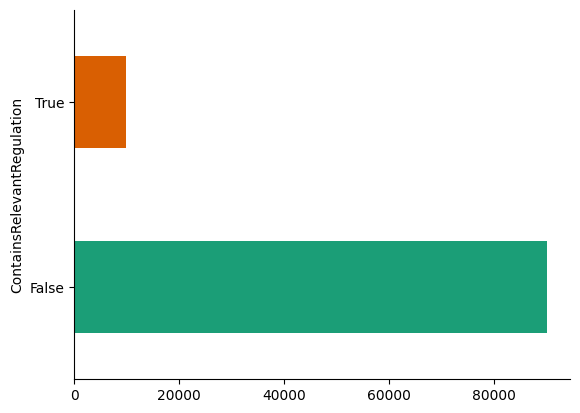

In [6]:
# @title ContainsRelevantRegulation

from matplotlib import pyplot as plt
import seaborn as sns
relevance_data.groupby('ContainsRelevantRegulation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## since the class (target variable) is not balance, find a way to balance the data points to avoid bias when predicting

In [7]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = relevance_data[relevance_data.ContainsRelevantRegulation == False]
df_minority = relevance_data[relevance_data.ContainsRelevantRegulation == True]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
relevance_data = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(relevance_data.ContainsRelevantRegulation.value_counts())


ContainsRelevantRegulation
False    90080
True     90080
Name: count, dtype: int64


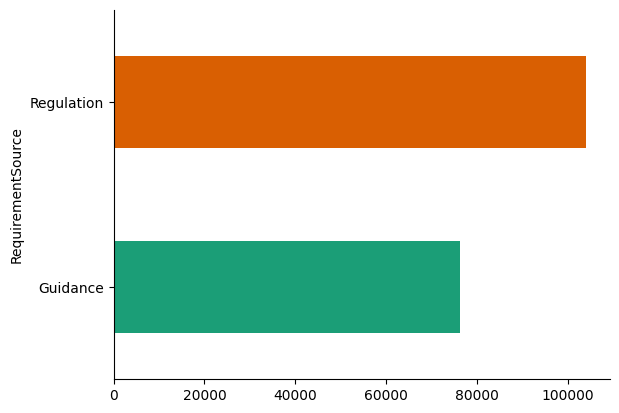

In [8]:
# @title RequirementSource

from matplotlib import pyplot as plt
import seaborn as sns
relevance_data.groupby('RequirementSource').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
#select needed columns
relevance_data = relevance_data[['DocumentID', 'ContainsRelevantRegulation', 'RequirementSource']]

In [10]:
#check if dataset has duplicate
relevance_data.duplicated().sum() #shows duplicate

80653

In [11]:
#drop duplicate
relevance_data.drop_duplicates(inplace = True)

In [12]:
#check dupliacte again
relevance_data.duplicated().sum() #shows no duplicate

0

In [13]:
#check the shape of the dataset
relevance_data.shape

(99507, 3)

In [14]:
#check the info of the dataset
relevance_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99507 entries, 1 to 98017
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   DocumentID                  99507 non-null  object
 1   ContainsRelevantRegulation  99507 non-null  bool  
 2   RequirementSource           99507 non-null  object
dtypes: bool(1), object(2)
memory usage: 2.4+ MB


In [15]:
#check for missing values
relevance_data.isnull().sum()

,0
DocumentID,0
ContainsRelevantRegulation,0
RequirementSource,0


In [16]:
#load the regulations dataset
regulations = pd.read_csv('/content/drive/MyDrive/Phase 1/regulations.csv')

In [17]:
#view the head section
regulations.head()

,Title,RegulatorId,SourceLanguage,DocumentTypeId,PublicationDate,IsPdf,Content,DocumentID
0,Federal Law Gazette Part I 2024 Issued to Bonn...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,2024-08-02 08:45:59.993000+00:00,True,Federal Gazette Part I 2024 Issued to Bonn on ...,3d80-b1ff-4b76-b59a-8c1be8a2
1,Readout of Vice President Harris’s Call with Y...,d47a-5966-4cac-802f-00b7cf36,English,9e76-0039-4827-a596-e841437e,2024-08-02 00:01:00.003000+00:00,False,"<time>August 01, 2024</time><div> <div> <p>Vic...",4b15-5b76-4828-b3b3-f3a58402
2,NOTE # 13.344 01 August 2024 The Agents are in...,749f-7ebf-4d0f-8ed9-dc645d9b,Spanish,f6e0-d6b3-471f-9811-dce56652,2024-08-02 05:51:00+00:00,True,NOTE # 13.344 01 August 2024 The Agents are in...,a6ec-8a09-443d-b28f-34763ca6
3,NOTE # 13.344 01 August 2024 The Agents are in...,749f-7ebf-4d0f-8ed9-dc645d9b,Spanish,f6e0-d6b3-471f-9811-dce56652,2024-08-02 05:51:00+00:00,True,NOTE # 13.344 01 August 2024 The Agents are in...,a6ec-8a09-443d-b28f-34763ca6
4,NOTE # 13.344 01 August 2024 The Agents are in...,749f-7ebf-4d0f-8ed9-dc645d9b,Spanish,f6e0-d6b3-471f-9811-dce56652,2024-08-02 05:51:00+00:00,True,NOTE # 13.344 01 August 2024 The Agents are in...,a6ec-8a09-443d-b28f-34763ca6


In [18]:
#check for missing values
regulations.isnull().sum()

,0
Title,396
RegulatorId,0
SourceLanguage,0
DocumentTypeId,0
PublicationDate,0
IsPdf,0
Content,603
DocumentID,0


In [19]:
#drop missing values
regulations.dropna(inplace = True)

In [20]:
#check for missing values again
regulations.isnull().sum()

,0
Title,0
RegulatorId,0
SourceLanguage,0
DocumentTypeId,0
PublicationDate,0
IsPdf,0
Content,0
DocumentID,0


In [21]:
#check for duplicate
regulations.duplicated().sum()

36493

In [22]:
#drop duplicate from the datase
regulations.drop_duplicates(inplace = True)

In [24]:
#check for duplicate again
regulations.duplicated().sum()

0

In [28]:
#select the needed columns
regulations = regulations[['DocumentID', 'Title', 'Content', 'RegulatorId', 'SourceLanguage', 'DocumentTypeId']]

### Check the distribution of the features

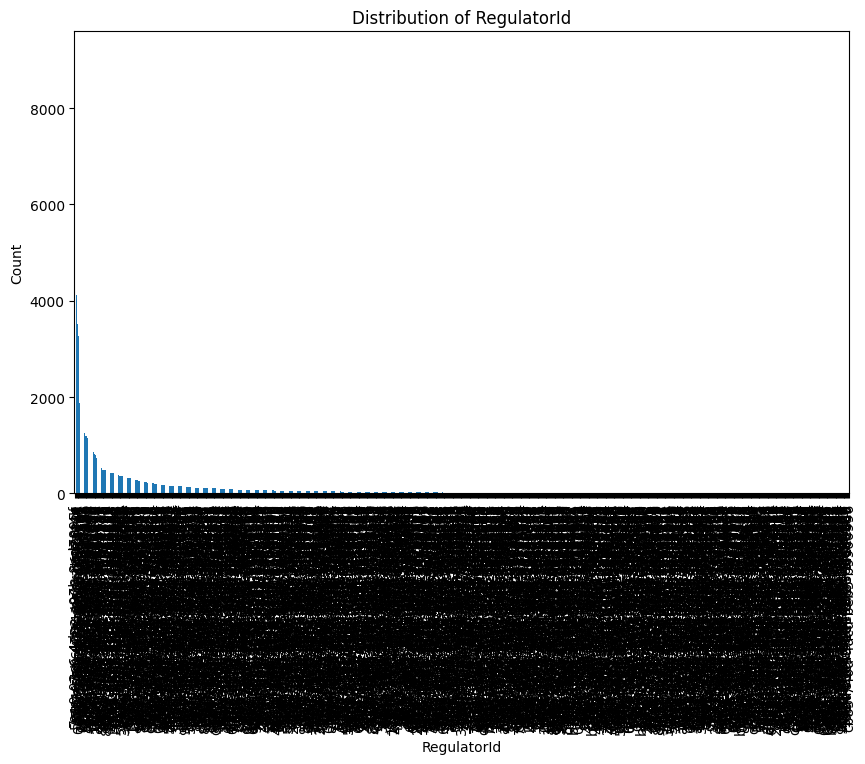

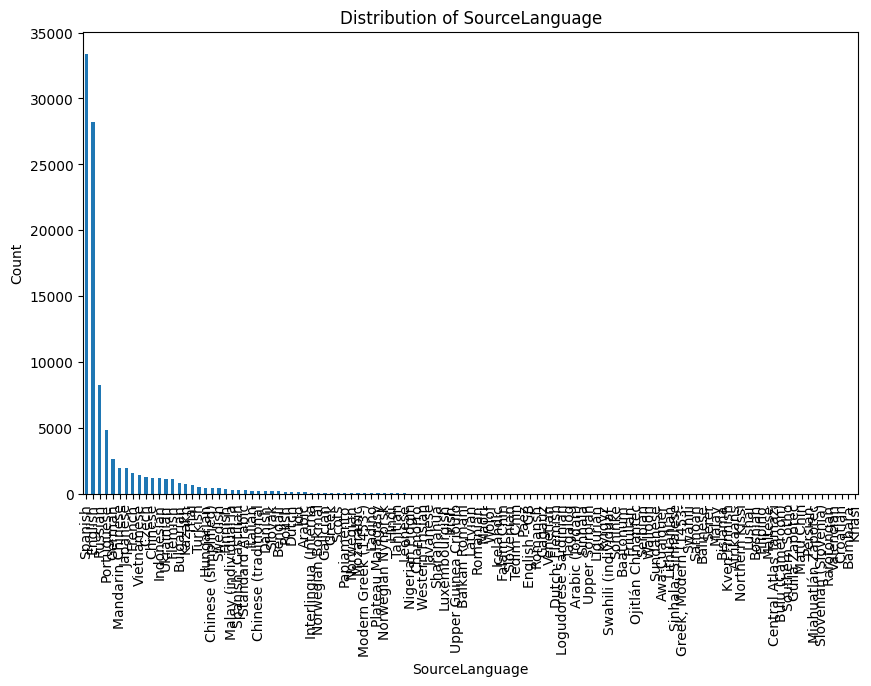

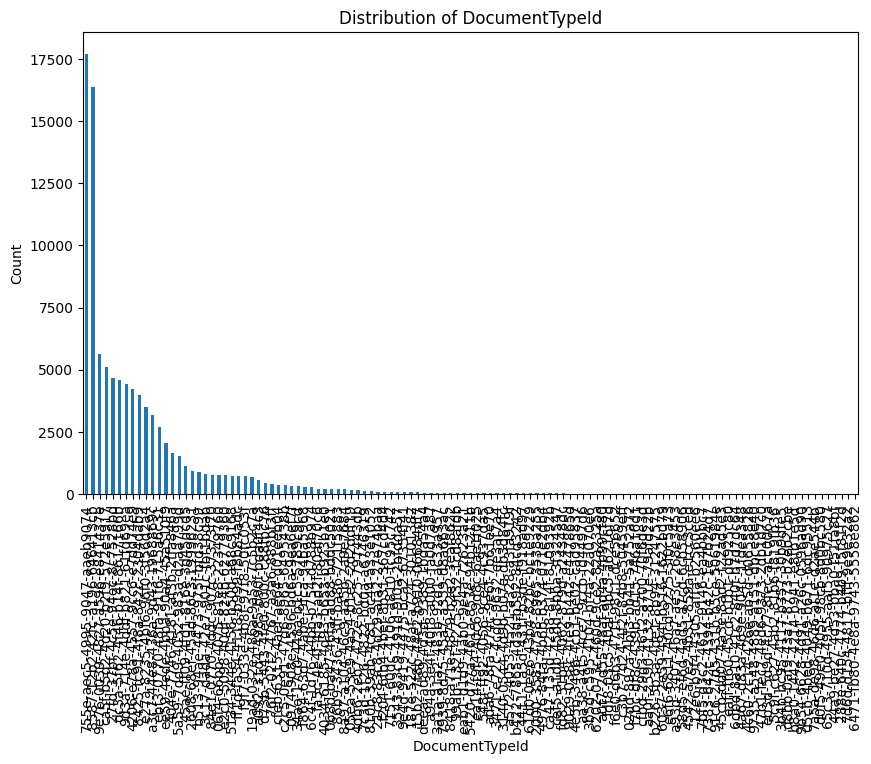

In [29]:
import matplotlib.pyplot as plt

# Plot the distribution of each categorical feature
categorical_columns = ['RegulatorId', 'SourceLanguage', 'DocumentTypeId']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    regulations[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [30]:
#merge the dataset using the DocumentID as key to get all information about a document in one row
merged_data = pd.merge(relevance_data, regulations, on = 'DocumentID')

In [36]:
#see the new merged data
merged_data.head() #here we can see that the row with the same DocumentID are merged together from the two documents

,DocumentID,ContainsRelevantRegulation,RequirementSource,Title,Content,RegulatorId,SourceLanguage,DocumentTypeId
0,104e-8d13-4537-8e56-415dacd8,False,Regulation,"Ref. No.: LIC/SE/2022-23/157 Date: 11th March,...","Ref. No.: LIC/SE/2022-23/157 Date: 11th March,...",76d2-78ec-48b7-a01e-7a8dd5c5,English,ee59-4ede-4bba-90a4-45a510f9
1,b634-3641-4f16-96cc-99e1cb85,False,Regulation,Bundesgesetzblatt Part I 2024 Issued to Bonn o...,Bundesgesetzblatt Part I 2024 Issued to Bonn o...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4
2,b634-3641-4f16-96cc-99e1cb85,False,Guidance,Bundesgesetzblatt Part I 2024 Issued to Bonn o...,Bundesgesetzblatt Part I 2024 Issued to Bonn o...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4
3,f452-1e80-482e-ab6b-86d02faf,False,Guidance,Women from rural areas will receive scholarshi...,"\n<meta http-equiv=""Content-Type"" content=""tex...",604b-bb64-43cd-b17c-ba097ac6,Spanish,9e76-0039-4827-a596-e841437e
4,4449-7753-44ab-a7cd-0559f4ab,False,Guidance,Digitally signed by: ROMERO PESANTES Christian...,Digitally signed by: ROMERO PESANTES Christian...,a501-ebb6-4f34-beca-df97a22c,Ido,ebf3-0770-48fa-91f6-715a6c31


In [37]:
#view the columns of the merged data
merged_data.columns

Index(['DocumentID', 'ContainsRelevantRegulation', 'RequirementSource',
       'Title', 'Content', 'RegulatorId', 'SourceLanguage', 'DocumentTypeId'],
      dtype='object')

# First Approach (simple method)

### Identify the keywords used in the content of the document

In [38]:


#import defaultdict from collections
from collections import defaultdict
#create key_word list
def create_relevant_keyword():
  #filter out the rows with value True for the ContainsRelevantRegulation Column
  relevant_document = merged_data[merged_data['ContainsRelevantRegulation'] == True]
  #choose the content column from the relevant_document to obtain the relevant key_words
  all_words = ' '.join(relevant_document['Content'].astype(str)).lower().split()
  #create a dictionary for counting the number of words in all_words
  word_count = defaultdict(int)
  #count the number of words in all_words
  for word in all_words:
    #for each word increase it number by 1
    word_count[word] += 1
  #return the 100 most common words
  return sorted(word_count, key = word_count.get, reverse = True)[:100]




In [39]:
#create the most used words
keywords = create_relevant_keyword()

#print the first 100
print(keywords)

['the', 'of', 'and', 'to', 'in', 'a', 'for', 'or', '0', 'be', 'by', 'on', 'is', '-', 'with', 'that', 'as', 'shall', 'not', 'this', 'are', 'an', 'from', 'which', '<div>', 'financial', '</td>', 'other', '<td>', '1', 'any', 'at', 'information', 'may', 'bank', 'it', 'under', 'its', 'article', '2', 'if', 'will', 'has', 'date', 'have', 'must', 'securities', '</div>', 'such', 'republic', 'paragraph', '3', 'credit', 'data', 'their', 'risk', 'should', 'section', 'services', 'legal', 'accordance', 'out', 'reporting', 'where', 'all', 'state', 'no', 'foreign', 'person', 'market', '§', 'following', '</tr>', 'payment', 'investment', '.', 'than', 'business', 'form', 'within', 'kazakhstan', 'management', 'provided', 'act', '5', 'amount', '4', '<tr>', 'requirements', 'account', 'exchange', 'service', 'public', 'electronic', 'national', 'case', 'been', 'into', 'tax', 'regulation']


In [40]:
# Define high relevance regulators, here we will only select regulator that give
#relevance document to financial law based on the value of the columns ContainsRelevantRegulation being True and thier regulator id
#we will count the number of times a regulator appears in this DataFrame using the value_counts method then return the first 5 elements as list
high_relevance_regulators = merged_data[merged_data['ContainsRelevantRegulation'] == True]['RegulatorId'].value_counts().index[:5].tolist()

# Print the first 5 high relevance regulators
print(high_relevance_regulators)

['591c-e7a9-4783-a908-6ed20f4b', '1ec1-7d3e-45ab-bd4f-ea7072a5', '4b7e-a862-48ce-a778-60fdd944', '7749-4d78-41bf-9f71-f418985b', 'a789-3bf9-4493-b548-b9ce15bb']


In [41]:
# Define high relevance documents, here we will only select documents that are
#relevance  to financial law based on the value of the columns ContainsRelevantRegulation being True and thier DocumentTypeId column
#we will count the number of times a document appears in this DataFrame using the value_counts method then return the first 5 elements as list
high_relevance_document_type = merged_data[merged_data['ContainsRelevantRegulation'] == True]['DocumentTypeId'].value_counts().index[:5].tolist()

# Print the first 5 high relevance regulators
for high_relevance_document in high_relevance_document_type:
  print(high_relevance_document)

dc3a-5f62-4f46-b14f-8617166b
755e-aec5-4995-9047-aaeb9074
8587-12b2-42fc-a196-646413cb
8425-fc91-4f8a-842c-2304dab9
9d3a-714e-4ddf-b821-61fd69ea


In [45]:
#Define the document relevance based on the language used. As we know that only English documents are needed by the Expert
language_factor = merged_data[(merged_data['ContainsRelevantRegulation'] == True) & (merged_data['SourceLanguage'] == 'English')][:2]




language_factor = [language_factor]

print(language_factor)

[                       DocumentID  ContainsRelevantRegulation  \
191  6732-0613-498e-ae64-623ea9b9                        True   
344  37b8-8668-4265-94f9-7b419a71                        True   

    RequirementSource                                              Title  \
191        Regulation  2024/59 Privacy (Information Sharing Agreement...   
344        Regulation  DRAFT FOR CONSULTATION, MAY 2024 Privacy Manag...   

                                               Content  \
191  2024/59 Privacy (Information Sharing Agreement...   
344  DRAFT FOR CONSULTATION, MAY 2024 Privacy Manag...   

                      RegulatorId SourceLanguage                DocumentTypeId  
191  6d3e-b002-423a-b8c0-6ba91653        English  9d3a-714e-4ddf-b821-61fd69ea  
344  d985-a5ab-4289-b390-08b86299        English  755e-aec5-4995-9047-aaeb9074  ]


### Now build a rule-based system model to implement these features

In [46]:
#set the least threadhold to confirm if a document is relevant
threshold = 3
#create a variable to check if the document is relevant
is_relevant = False
#create a function to check the document relevance
def check_document_relevance(document):
  #set initial value for score
  score = 0

  #check if document is in high_relevance_regulators
  if document['RegulatorId'] in high_relevance_regulators:
    score += 1

  #check if document is in high_relevance_document_type
  if document['DocumentTypeId'] in high_relevance_document_type:
    score += 1

  # Extract the 'SourceLanguage' values from the DataFrame within language_factor
  valid_languages = language_factor[0]['SourceLanguage'].tolist()

  #check if document is in valid_languages
  if document['SourceLanguage'] in valid_languages:
    score += 1

  # Handle potential float values in 'Content'
  content = str(document['Content']) # Convert 'Content' to a string if it's a float

  #check if document has the keyword
  for keyword in keywords:
    if keyword in content: # Search in the string representation
      score += 1

  #check if the score is above the threshold
  is_relevant = score >= threshold
  #return the result
  return is_relevant

In [69]:
#Identify regulations not in relevance data
relevance_doc_ids = set(relevance_data['DocumentID'])
new_regulations = regulations[~regulations['DocumentID'].isin(relevance_doc_ids)]

print(f"Number of new regulations to process: {len(new_regulations)}")

Number of new regulations to process: 19741


In [70]:
#apply the rule based system defined above to the new_regulations
results = []
for _, doc in new_regulations.iterrows():
  processed_doc = check_document_relevance(doc)
  results.append({
      'DocumentID' : doc['DocumentID'],
      'ContainRelevantRegulation': is_relevant
  })

In [49]:
#create a dataframe with our result above
prediction_df = pd.DataFrame(results)

#save dataframe as prediction.csv
prediction_df.to_csv('prediction_df1.csv', index = False)

### check the perfomance of the model

In [51]:
# Apply rules to the merged dataset
merged_data['PredictedRelevance'] = merged_data.apply(check_document_relevance, axis=1)

# Evaluate the system
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(merged_data['ContainsRelevantRegulation'], merged_data['PredictedRelevance'])
precision = precision_score(merged_data['ContainsRelevantRegulation'], merged_data['PredictedRelevance'])
recall = recall_score(merged_data['ContainsRelevantRegulation'], merged_data['PredictedRelevance'])
f1 = f1_score(merged_data['ContainsRelevantRegulation'], merged_data['PredictedRelevance'])

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.10006307992837375
Precision: 0.09915562391142708
Recall: 0.9990763546798029
F1 Score: 0.1804064008598723


In [52]:
merged_data.head()

,DocumentID,ContainsRelevantRegulation,RequirementSource,Title,Content,RegulatorId,SourceLanguage,DocumentTypeId,PredictedRelevance
0,104e-8d13-4537-8e56-415dacd8,False,Regulation,"Ref. No.: LIC/SE/2022-23/157 Date: 11th March,...","Ref. No.: LIC/SE/2022-23/157 Date: 11th March,...",76d2-78ec-48b7-a01e-7a8dd5c5,English,ee59-4ede-4bba-90a4-45a510f9,True
1,b634-3641-4f16-96cc-99e1cb85,False,Regulation,Bundesgesetzblatt Part I 2024 Issued to Bonn o...,Bundesgesetzblatt Part I 2024 Issued to Bonn o...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,True
2,b634-3641-4f16-96cc-99e1cb85,False,Guidance,Bundesgesetzblatt Part I 2024 Issued to Bonn o...,Bundesgesetzblatt Part I 2024 Issued to Bonn o...,9a27-032b-4be1-a886-44b1e915,German,e27a-8235-4bf6-96f0-3f56d2a4,True
3,f452-1e80-482e-ab6b-86d02faf,False,Guidance,Women from rural areas will receive scholarshi...,"\n<meta http-equiv=""Content-Type"" content=""tex...",604b-bb64-43cd-b17c-ba097ac6,Spanish,9e76-0039-4827-a596-e841437e,True
4,4449-7753-44ab-a7cd-0559f4ab,False,Guidance,Digitally signed by: ROMERO PESANTES Christian...,Digitally signed by: ROMERO PESANTES Christian...,a501-ebb6-4f34-beca-df97a22c,Ido,ebf3-0770-48fa-91f6-715a6c31,True


# Second Approach (More Robust)

In [53]:
#create a function to calculate the score of regulator using its Id
def calculate_regulator_score(regulator_id):
  # Filter the DataFrame for the given regulator ID
  regulator_document = merged_data[merged_data['RegulatorId'] == regulator_id]
  # Check if the DataFrame is empty
  if regulator_document.empty:
    # Return 0 if the DataFrame is empty
    return 0
    # Calculate the mean of the 'ContainsRelevantRegulation' column and return it result
  return regulator_document['ContainsRelevantRegulation'].mean() * 100

  # Calculate the score for each unique regulator ID using the calculater_regulator_score function above
  # and store the results in the regulator_score dictionary
regulator_score = {regulator: calculate_regulator_score(regulator) for regulator in merged_data['RegulatorId'].unique()}

In [54]:
#create a function to calculate the score of document type using its Id
def calculate_document_type_score(document_type_id):
  # Filter the DataFrame for the given document type ID
  document_type_document = merged_data[merged_data['DocumentTypeId'] == document_type_id] # Indent this line
  # Check if the DataFrame is empty
  if document_type_document.empty:
    # Return 0 if the DataFrame is empty
    return 0
    # Calculate the mean of the 'ContainsRelevantRegulation' column and return it result
  return document_type_document['ContainsRelevantRegulation'].mean() * 100 # Indent this line

# Calculate the score for each unique document type ID using the calculater_document_type_score function above
# and store the results in the document_type_score dictionary
document_type_score = { document_type: calculate_document_type_score(document_type) for document_type in merged_data['DocumentTypeId'].unique()} # Indent this line

In [55]:
#create a function to calculate the score of relevant keyword in the content column
def calculate_keyword_relevant_score(content):
  # Convert the content to lowercase
  content_lower = content.lower()
  # Count the number of keywords in the content
  return sum( 1 for keyword in keywords if keyword in content_lower)

In [56]:
# Requirement Language Factor
# Group the data by 'SourceLanguage' and calculate the mean of 'ContainsRelevantRegulation' and return it as dictionary
language_scores = merged_data.groupby('SourceLanguage')['ContainsRelevantRegulation'].mean().to_dict()

# Requirement Source Factor
# Group the data by 'RequirementSource' and calculate the mean of 'ContainsRelevantRegulation' and return it as dictionary
source_scores = merged_data.groupby('RequirementSource')['ContainsRelevantRegulation'].mean().to_dict()

In [57]:
merged_data.columns

Index(['DocumentID', 'ContainsRelevantRegulation', 'RequirementSource',
       'Title', 'Content', 'RegulatorId', 'SourceLanguage', 'DocumentTypeId',
       'PredictedRelevance'],
      dtype='object')

### Now build a rule-based system model to implement these features

In [58]:
#create a function to calculate the combined score of a document using all the functions above
def calculate_combined_score(document):
  # given the regulator id of the document, get the regulator score of that id using the calculate_regulator_score function above
  regulator_scores = regulator_score.get(document['RegulatorId'], 0)
  # given the document type id of the document, get the document type score of that id using the calculate_document_type_score function above
  document_type_scores = document_type_score.get(document['DocumentTypeId'], 0)
  # Safely concatenate Content and Title, converting to string and handling NaN values
  content = str(document['Content']) if pd.notna(document['Content']) else ''
  title = str(document['Title']) if pd.notna(document['Title']) else ''
  combined_text = content + ' ' + title

  # Calculate the keyword score of the combined_text variable using the calculate_keyword_relevant_score function above
  keyword_score = calculate_keyword_relevant_score(combined_text)
  #given the source language of the document, get the language score of that language using the language_scores dictionary above
  language_score = language_scores.get(document['SourceLanguage'], 0) * 100
  #return the weighted average of the four scores
  return (regulator_scores * 0.25 + document_type_scores * 0.25 + keyword_score * 0.3 + language_score * 0.2)

In [59]:
# Set threshold
threshold = 50

# Function to process new documents
def process_new_document(doc):
    # Calculate the combined score using the calculate_combined_score above
    score = calculate_combined_score(doc)
    # Check if the score is above the threshold
    is_relevant = score > threshold

    # Safely concatenate Content and Title, converting to string and handling NaN values
    content = str(doc['Content']) if pd.notna(doc['Content']) else ''
    title = str(doc['Title']) if pd.notna(doc['Title']) else ''
    combined_text = content + ' ' + title

    #return a dictionary of scores
    return {
        'DocumentID': doc['DocumentID'],
        'CombinedScore': score,
        'IsRelevant': is_relevant,
        'RegulatorScore': regulator_score.get(doc['RegulatorId'], 0),
        'DocTypeScore': document_type_score.get(doc['DocumentTypeId'], 0),
        'KeywordScore': calculate_keyword_relevant_score(combined_text),
        'LanguageScore': language_scores.get(doc['SourceLanguage'], 0) * 100
    }


In [60]:
# Example usage
# Create a new document with sample data
new_doc = regulations.iloc[0].to_dict()  # Just using the first document as an example
#use the process_new_document function above to calculate the document scores
result = process_new_document(new_doc)
#print the result
for results in result.items():
  print(results)


('DocumentID', '3d80-b1ff-4b76-b59a-8c1be8a2')
('CombinedScore', 21.487599655150458)
('IsRelevant', False)
('RegulatorScore', 5.492957746478874)
('DocTypeScore', 11.477946866133609)
('KeywordScore', 53)
('LanguageScore', 6.724367509986684)


In [61]:
# To process all documents across the rows using the process_new_document function
all_results = regulations.apply(process_new_document, axis=1)


In [62]:
#create a list for the combined_score
combined_score = []
for key, results in all_results.items():
  if all_results[key]['CombinedScore'] > 50:
    combined_score.append(all_results[key]['CombinedScore'])
    print(f'{key}\t{results}')

1630	{'DocumentID': 'fa89-ba42-4a67-beeb-10b58a30', 'CombinedScore': 58.51625998949568, 'IsRelevant': True, 'RegulatorScore': 95.90163934426229, 'DocTypeScore': 22.928331466965286, 'KeywordScore': 88, 'LanguageScore': 12.04383643344392}
3167	{'DocumentID': '1681-b97f-4fd5-8cc3-994fa127', 'CombinedScore': 51.208984281471565, 'IsRelevant': True, 'RegulatorScore': 100.0, 'DocTypeScore': 5.27933132567144, 'KeywordScore': 76, 'LanguageScore': 10.445757250268528}
4215	{'DocumentID': 'b8cc-53da-43a0-bac5-a8a2a4c0', 'CombinedScore': 59.50876728668878, 'IsRelevant': True, 'RegulatorScore': 48.0, 'DocTypeScore': 100.0, 'KeywordScore': 67, 'LanguageScore': 12.04383643344392}
4234	{'DocumentID': '2c04-8edc-4766-a090-82f8da97', 'CombinedScore': 50.862353137011596, 'IsRelevant': True, 'RegulatorScore': 81.08108108108108, 'DocTypeScore': 22.928331466965286, 'KeywordScore': 69, 'LanguageScore': 20.8}
5480	{'DocumentID': '744d-5f1b-4d33-9a96-625fd2ed', 'CombinedScore': 51.89960667329088, 'IsRelevant': 

In [56]:
import statistics

if combined_score:
  mean_score = statistics.mean(combined_score)
  median_score = statistics.median(combined_score)
  mode_score = statistics.mode(combined_score)

  print(f'\nMean CombinedScore: {mean_score}')
  print(f'Median CombinedScore: {median_score}')
  print(f'Mode CombinedScore: {mode_score}')
else:
  print('No valid combined scores found.')



Mean CombinedScore: 54.055354796173724
Median CombinedScore: 53.95148600646416
Mode CombinedScore: 54.57982020356537


# Model Prediction and Perfomance

In [63]:
# Step 1: Identify regulations not in relevance data
relevance_doc_ids = set(relevance_data['DocumentID'])
new_regulations = regulations[~regulations['DocumentID'].isin(relevance_doc_ids)]

print(f"Number of new regulations to process: {len(new_regulations)}")

Number of new regulations to process: 19741


In [64]:
#apply the rule based system to the new_regulations
results = []
for _, doc in new_regulations.iterrows():
  processed_doc = process_new_document(doc)
  results.append({
      'DocumentID' : doc['DocumentID'],
      'ContainRelevantRegulation': processed_doc['IsRelevant']
  })

In [65]:
#create a dataframe with our result above
prediction_df = pd.DataFrame(results)

#save dataframe as prediction.csv
prediction_df.to_csv('prediction_df2.csv', index = False)

In [66]:
prediction_df.head()

,DocumentID,ContainRelevantRegulation
0,39b5-8d6a-4936-a31b-f36a0ee5,False
1,30cf-5931-45ed-866a-ac46442d,False
2,f316-dbe6-458d-b016-b5bec93e,False
3,65b3-8c8e-4c53-ae1c-ef64f954,False
4,d9c6-d576-4d30-b939-44c93ab6,False


In [72]:
prediction_df.shape

(19741, 2)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Split the data
train_data, test_data = train_test_split(merged_data, test_size=0.2, random_state=42)

# Step 2: Apply your model to the test data
test_predictions = []
for _, doc in test_data.iterrows():
    prediction = process_new_document(doc)
    test_predictions.append(prediction['IsRelevant'])

# Step 3 & 4: Compare predictions with true labels and calculate metrics
true_labels = test_data['ContainsRelevantRegulation'].values
accuracy = accuracy_score(true_labels, test_predictions)
precision = precision_score(true_labels, test_predictions)
recall = recall_score(true_labels, test_predictions)
f1 = f1_score(true_labels, test_predictions)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate and print the confusion matrix
cm = confusion_matrix(true_labels, test_predictions)
print("\nConfusion Matrix:")
print(cm)

# Calculate and print additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

print(f"\nSpecificity: {specificity:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"False Negative Rate: {false_negative_rate:.4f}")

Accuracy: 0.9058
Precision: 0.8864
Recall: 0.0207
F1 Score: 0.0404

Confusion Matrix:
[[17767     5]
 [ 1847    39]]

Specificity: 0.9997
False Positive Rate: 0.0003
False Negative Rate: 0.9793
